In [1]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import pandas as pd

from sklearn import svm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage




In [2]:

img=Image.open(r"./part5_ok_cam1_deg1.tiff")


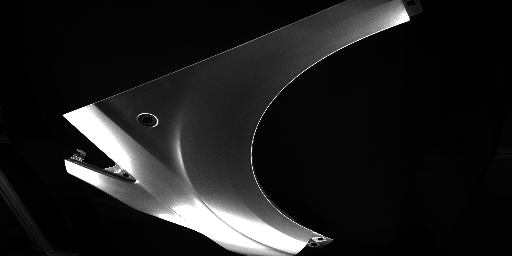

In [3]:
img.size
img=img.resize((512,256))
img

In [4]:
img = cv2.imread('C:/Users/admin/Desktop/IMAGE/bitirme/bitirme_deneme/gerekli_dosyalar/case12_part5_ok_4/part5_ok_cam1_deg1.tiff',0)
img = cv2.resize(img,(512,512))

In [5]:
def printThreshold(x):
    print ("threshold",x)
def printGaussianBlur(x):
    print ("gaussian blur kernel size",x)

cv2.namedWindow('processed')

cv2.createTrackbar('threshold','processed',60,255,printThreshold)
cv2.createTrackbar('gaussian blur','processed',3,10,printGaussianBlur)



while 1:
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    kernelSize = ((cv2.getTrackbarPos('gaussian blur','processed') * 2) + 1)
    blur = cv2.GaussianBlur(img,(kernelSize,kernelSize),0)
    ret,thresh = cv2.threshold(blur,cv2.getTrackbarPos('threshold','processed',),255,0)
    cv2.imshow('processed ',thresh)

cv2.destroyAllWindows()


threshold 61
threshold 62
threshold 63
threshold 65
threshold 67
threshold 68
threshold 17


In [6]:
kernel1 = np.ones((3,3), np.uint8) 
kernel2 = np.ones((3,5), np.uint8)
kernel3 = np.ones((5,5), np.uint8) 


In [7]:
def printIterations(x):
    print ("iterations",x)

cv2.namedWindow('processed')

cv2.createTrackbar('iterations','processed',0,20,printIterations)




while 1:
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    iteration = cv2.getTrackbarPos('iterations','processed')
    
    dilation = cv2.dilate(img, kernel1, iterations=iteration)
    
    ret,thresh = cv2.threshold(dilation,cv2.getTrackbarPos('iterations','processed',),256,0)
    
    cv2.imshow('processed',thresh)

cv2.destroyAllWindows()

iterations 1
iterations 2
iterations 3
iterations 4


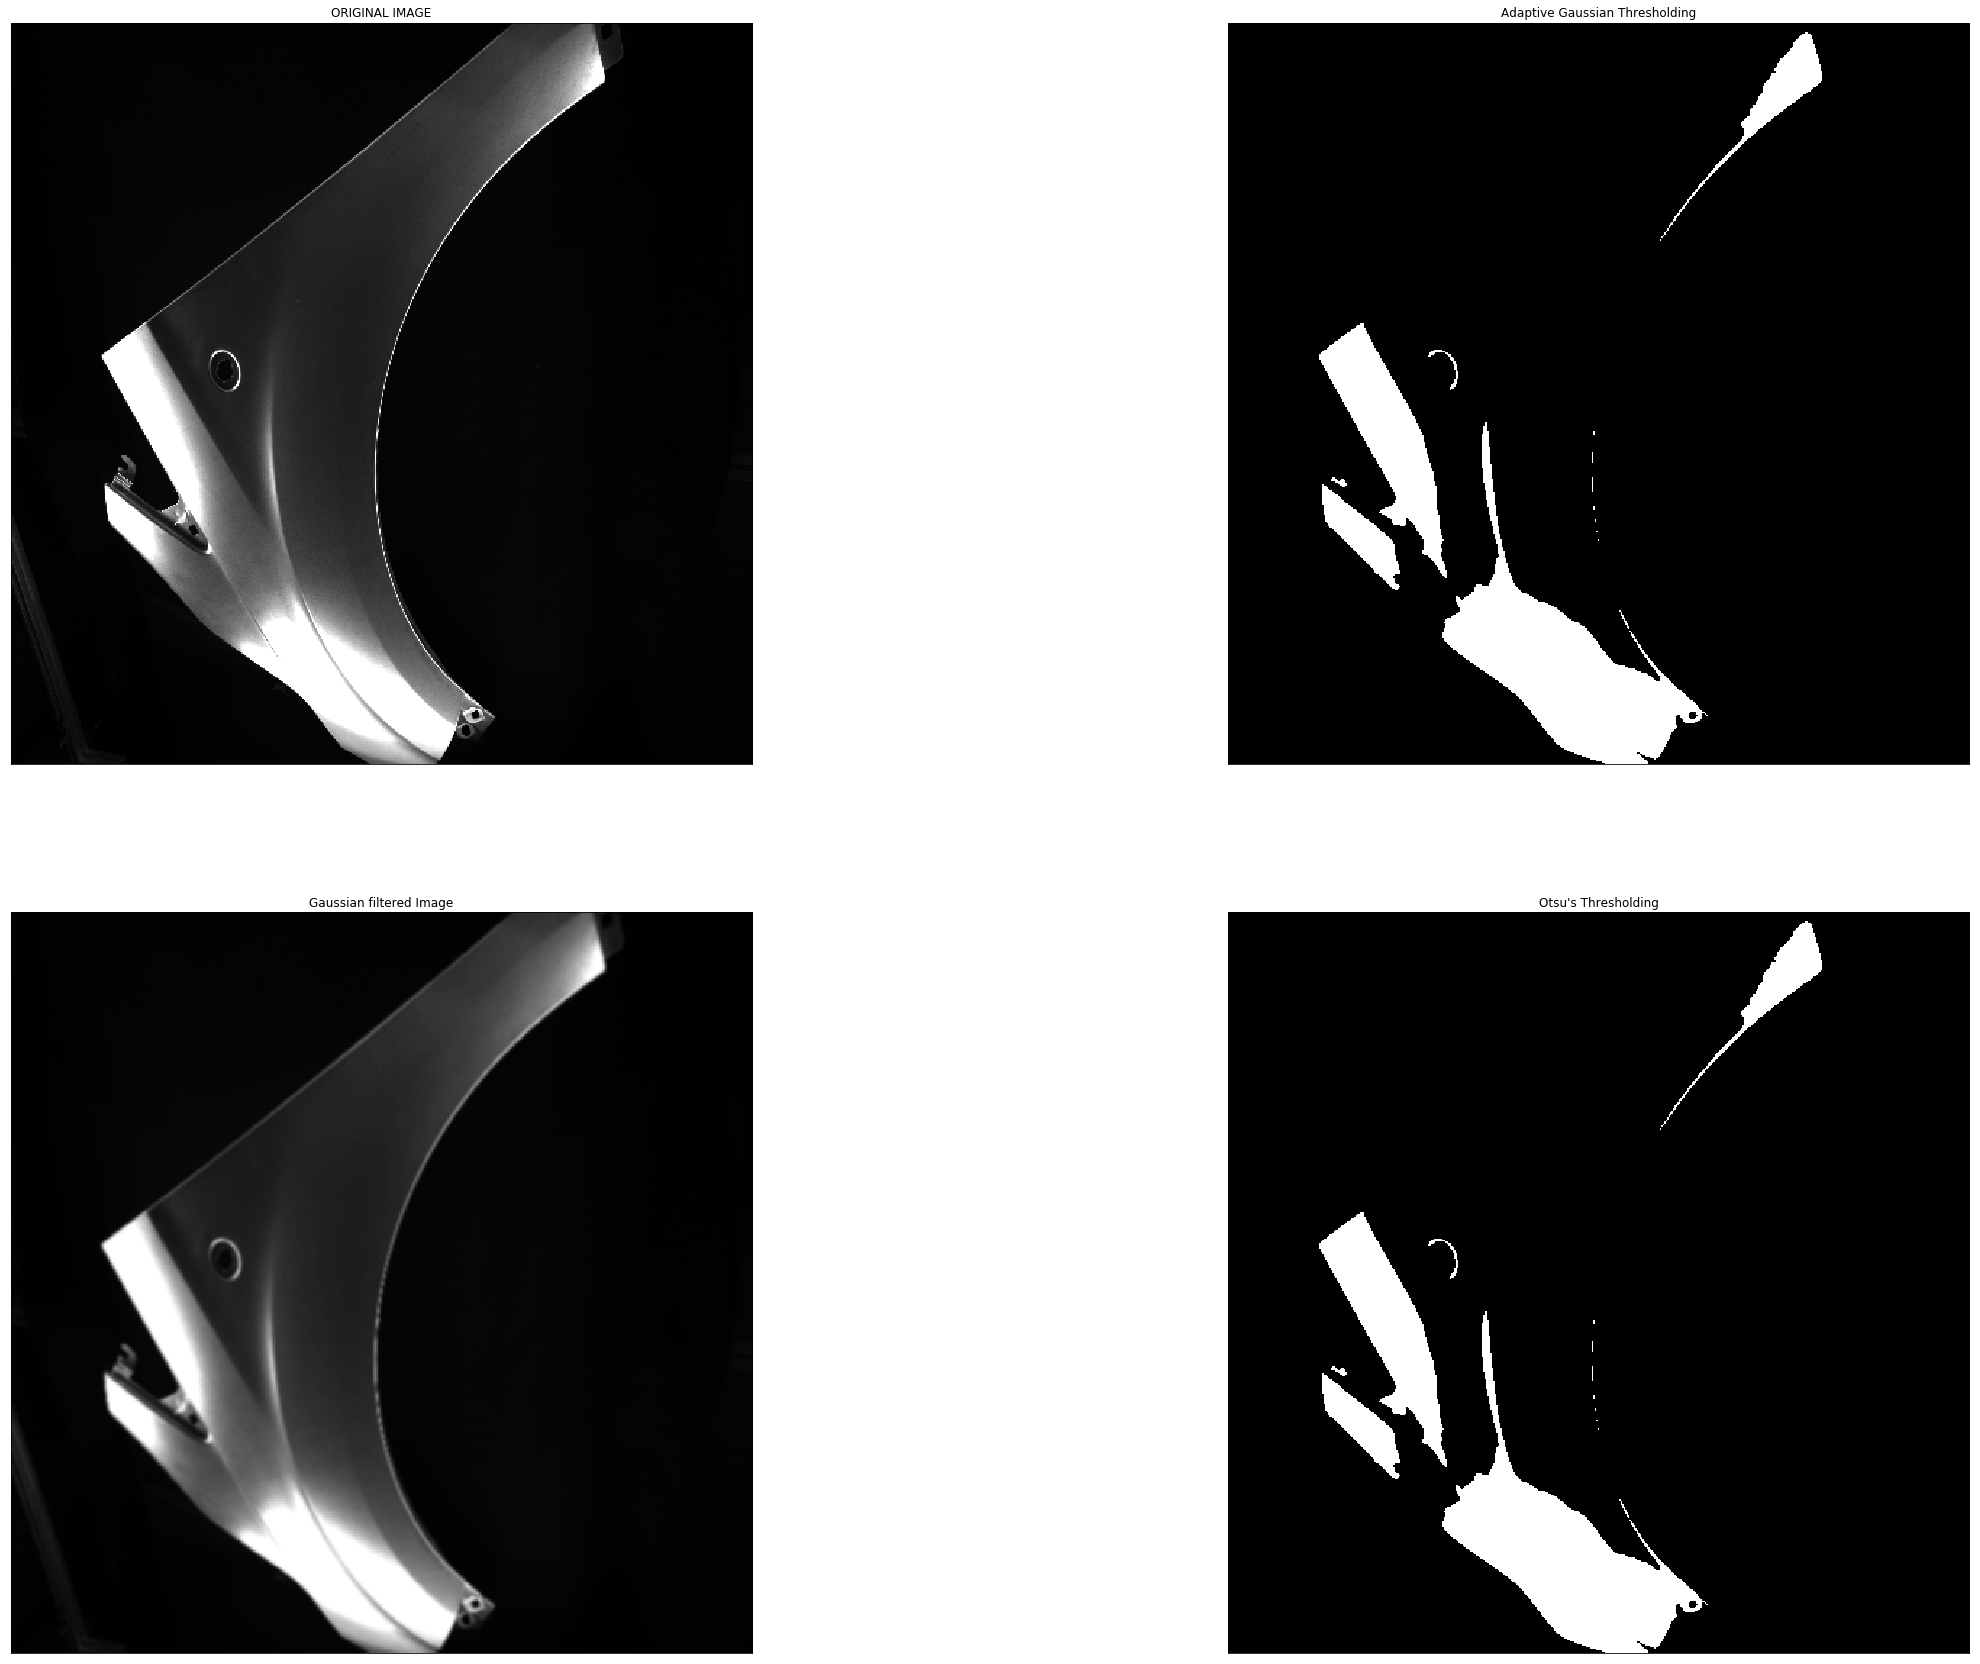

In [8]:


th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(40,30))

plt.subplot(2,2,1),plt.imshow(img,'gray')
plt.title("ORIGINAL IMAGE")
plt.xticks([]),plt.yticks([])


plt.subplot(2,2,2),plt.imshow(th3,'gray')
plt.title("Adaptive Gaussian Thresholding")
plt.xticks([]),plt.yticks([])



plt.subplot(2,2,3),plt.imshow(blur,'gray')
plt.title('Gaussian filtered Image')
plt.xticks([]),plt.yticks([])
    
#plt.subplot(3,1,2),plt.hist(blur.ravel(),256)
    
plt.subplot(2,2,4),plt.imshow(th3,'gray')
plt.title("Otsu's Thresholding")
plt.xticks([]),plt.yticks([])
   
plt.show()


In [34]:
# slider callbacks
def printThreshold(x):
    print ("threshold",x)
def printGaussianBlur(x):
    print ("gaussian blur kernel size",x)
# make a window to add sliders/preview to
cv2.namedWindow('processed')
#make some sliders
cv2.createTrackbar('threshold','processed',60,255,printThreshold)
cv2.createTrackbar('gaussian blur','processed',3,10,printGaussianBlur)
# load image
img = cv2.imread('C:/Users/user/Desktop/IMAGE/bitirme/bitirme_deneme/gerekli_dosyalar/case12_part5_ok_4/part5_ok_cam1_deg1.tiff',0)

img = cv2.resize(img,(512,512))
# continously process for quick feedback
while 1:
    # exit on ESC key
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # Gaussian Blur ( x2 +1 = odd number for kernel size)
    #kernelSize = ((cv2.getTrackbarPos('gaussian blur','processed') * 2) + 1)
    #blur = cv2.GaussianBlur(img,(kernelSize,kernelSize),0)
    iteration = cv2.getTrackbarPos('iterations','processed')
    dilation = cv2.dilate( img, kernel1, iterations=iteration) 
   
    # Threshold
    ret,thresh = cv2.threshold(dilation,cv2.getTrackbarPos('threshold','processed',),255,0)
    # show result
    cv2.imshow('processed',thresh)

# exit
cv2.destroyAllWindows()

In [ ]:
def printIterations(x):
    print ("iterations",x)
def printGaussianBlur(x):
    print ("gaussian blur kernel size",x)
# make a window to add sliders/preview to
cv2.namedWindow('processed')
#make some sliders
cv2.createTrackbar('iterations','processed',0,20,printIterations)
cv2.createTrackbar('gaussian blur','processed',3,10,printGaussianBlur)
# load image
img = cv2.imread('C:/Users/user/Desktop/IMAGE/bitirme/bitirme_deneme/gerekli_dosyalar/case12_part5_ok_4/part5_ok_cam1_deg1.tiff',0)
# continously process for quick feedback



while 1:
    # exit on ESC key
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        
        break

    iteration = cv2.getTrackbarPos('iterations','processed')
    #Gaussian Blur ( x2 +1 = odd number for kernel size)
    #kernelSize = ((cv2.getTrackbarPos('gaussian blur','processed') * 2) + 1)
    dilation = cv2.dilate(img, kernel1, iterations=iteration)
    
        
    
    # Threshold
    ret,thresh = cv2.threshold(dilation,cv2.getTrackbarPos('iterations','processed',),256,0)
    
    # show result
    cv2.imshow('processed',thresh)

# exit
cv2.destroyAllWindows()


 
    
    

In [ ]:

plt.imshow(dilation,'gray')

In [ ]:
plt.imshow(cv2.dilate(img, kernel1, iterations=5),"gray")

In [ ]:
printGaussianBlur(3)

In [ ]:
dilation = cv2.dilate( img, kernel1, iterations=9) 
plt.imshow(dilation,'gray')

In [ ]:
dilation = cv2.erode( img, kernel1, iterations=9) 
plt.imshow(dilation,'gray')

In [ ]:
kernelSize = ((cv2.getTrackbarPos('gaussian blur','processed') * 2))
#blur = cv2.GaussianBlur(img,(kernelSize,kernelSize),0)
kernelSize

In [ ]:
cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) 
cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) 
cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst

src – input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F` or ``CV_64F.
•dst – output image of the same size and type as src.
•kernel – structuring element used for erosion; if element=Mat() , a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement().
•anchor – position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
•iterations – number of times erosion is applied.
•borderType – pixel extrapolation method (see borderInterpolate for details).
•borderValue – border value in case of a constant border



In [ ]:
img.mode

In [ ]:
img1.ndim

In [ ]:
img_cs=img.resize((512,256))
img_cs

In [ ]:
array= np.array(img)
array.shape


In [ ]:
noisy_cs=[]
noisy_gs=[]
def Gaussian_noises(image,sigma,mean):
    image_array= np.array(image)
    plt.subplot(121),plt.imshow(image),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.show()
    row,col=np.array(image).shape
    for i in range(len(sigma)):
        gauss = np.array(np.random.normal(mean,sigma[i],(row,col)),dtype=np.int8)
        noisy = (image_array + gauss).astype(np.uint8)
        noisy_cs.append(noisy)
        plt.subplot(122),plt.imshow(noisy),plt.title('Sigma Value is = {}'.format(sigma[i]))
        plt.xticks([]), plt.yticks([])
        plt.show()
        array= np.array(noisy)
        array[:] = array.mean(axis=-1,keepdims=1)
        noisy_gs.append(array)
        plt.subplot(122),plt.imshow(array),plt.title('Sigma Value is = {}'.format(sigma[i])) 
        plt.xticks([]), plt.yticks([])
        plt.show()

In [ ]:
image_array= np.array(img)
image_array.shape

In [ ]:
sigma=[1,5,10,20]
mean=0
Gaussian_noises(img,sigma,mean)

In [ ]:
kernel_LP_1.ndim
#array.ndim


In [ ]:
Kernel_LP=[]
Kernel_HP=[]
A=np.random.random_sample()+1
A=round(A,1)

kernel_LP_1 = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])/9
kernel_LP_2 = np.array([[1, 1, 1, 1, 1],
                   [1,  1,  1, 1, 1],
                   [1,  1,  1, 1, 1],
                   [1,  1,  1, 1, 1],
                   [1, 1, 1, 1, 1]])/25

kernel_LP_3 = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])

for x in (kernel_LP_1,kernel_LP_2,kernel_LP_3):
    Kernel_LP.append(x)
    
kernel_HP_1= np.array([[[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]]])

kernel_HP_2= np.array([[[0.17,0.67,0.17],
                   [0.67,-3.33,0.67],
                   [0.17,0.67,0.17]]])



kernel_HP_3= np.array([[[-1,-1,-1],
                   [-1,((9*A)-1),-1],
                   [-1,-1,-1]]])

for y in (kernel_HP_1,kernel_HP_2,kernel_HP_3):
    Kernel_HP.append(y)


In [ ]:
def low_pass_cs (Kernel_LP,noisy_cs,sigma):
    print ("\n\tUSING LOW PASS FILTER ON COLOUR IMAGES\n")
    
    #    Kernel_LP refer to low_pass filter
    #    Kernel_HP refer to high_pass filter
    #    Noisy cs refer to noised colour scene df list
    #    Noisy gs refer to noised gray scene df list
    for x in range(len(Kernel_LP)):
        if x==0:
            print ("for kernel_LP_1 type which is:")
            print(kernel_LP_1)
            
        elif x==1:
            print ("for kernel_LP_2 type which is:")
            print(kernel_LP_2)
        elif x==2:
            print ("for kernel_LP_3 type which is:")
            print(kernel_LP_3)
        for y in range(len(noisy_cs)):
            data = np.array(noisy_cs[y], dtype=int)
            lowpass = ndimage.convolve(data, Kernel_LP[x])
            plt.subplot(122),plt.imshow((lowpass).astype(np.uint8)),plt.title('Sigma Value is = {}'.format(sigma[y]))# noisy_cs[y])
            plt.show()
        

low_pass_cs(Kernel_LP,noisy_cs,sigma)


In [ ]:
array= np.array(img)
array.shape

In [ ]:
img1.size

In [ ]:
img_Binary_array=img1.copy()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img_Binary_array[i,j] <2:
            img_Binary_array[i,j]=0
        else:
            img_Binary_array[i,j]=255

In [ ]:
img_Binary = Image.fromarray(img_Binary_array)
plt.subplot(1,1,1),plt.imshow(img_Binary)
plt.title("img_Binary")
plt.show()

In [ ]:
img.size

In [ ]:
img1.shape

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
rows, cols = img.size
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
blur = cv2.blur(array,(5,5))
blur
img_Blur = Image.fromarray(array)
plt.subplot(1,1,1),plt.imshow(img_Binary)
plt.title("img_Binary")
plt.show()

In [ ]:
img_Binary_array

In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('noisy2.png',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]



In [84]:
img = cv2.imread('noisy2.png',0)
type(img)

NoneType

In [ ]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
